In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv('dataset_heart.csv')
data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
data.shape

(270, 14)

# Exploratory Data Analysis

In [4]:
for i in data.columns:
    print(f'Column {i} : {data[i].unique()}')

Column age : [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
Column sex  : [1 0]
Column chest pain type : [4 3 2 1]
Column resting blood pressure : [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
Column serum cholestoral : [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290

In [5]:
data['sex '] = data['sex '].map({1:'male', 0 : 'female'})
data['sex '].unique()

array(['male', 'female'], dtype=object)

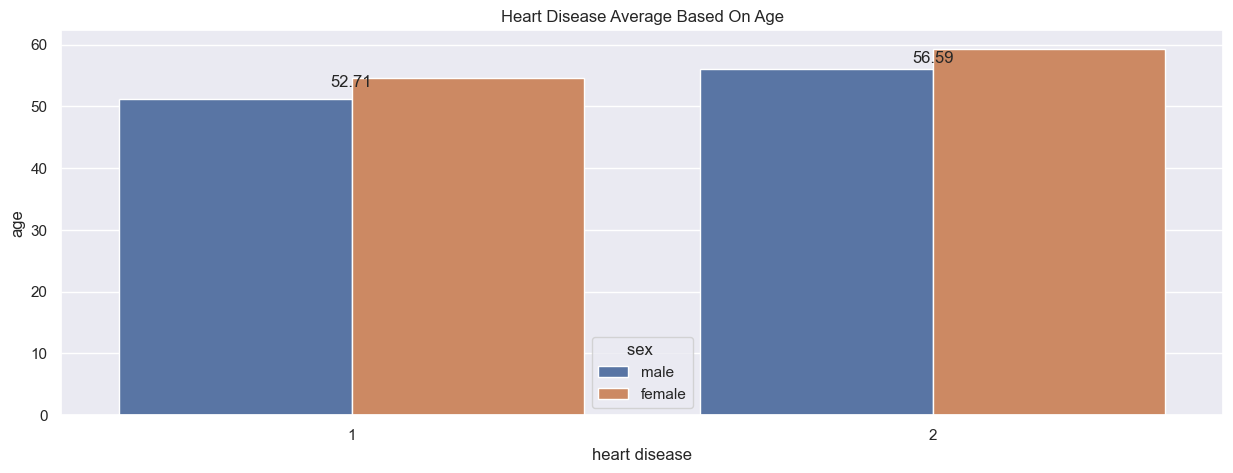

In [6]:
ax = plt.figure(figsize=(15,5))
ax = sns.barplot(data, x='heart disease', y='age', hue='sex ', errorbar=None)

mean_values = data.groupby('heart disease')['age'].mean()

for i, mean in enumerate(mean_values):
    ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.title("Heart Disease Average Based On Age")

plt.show()

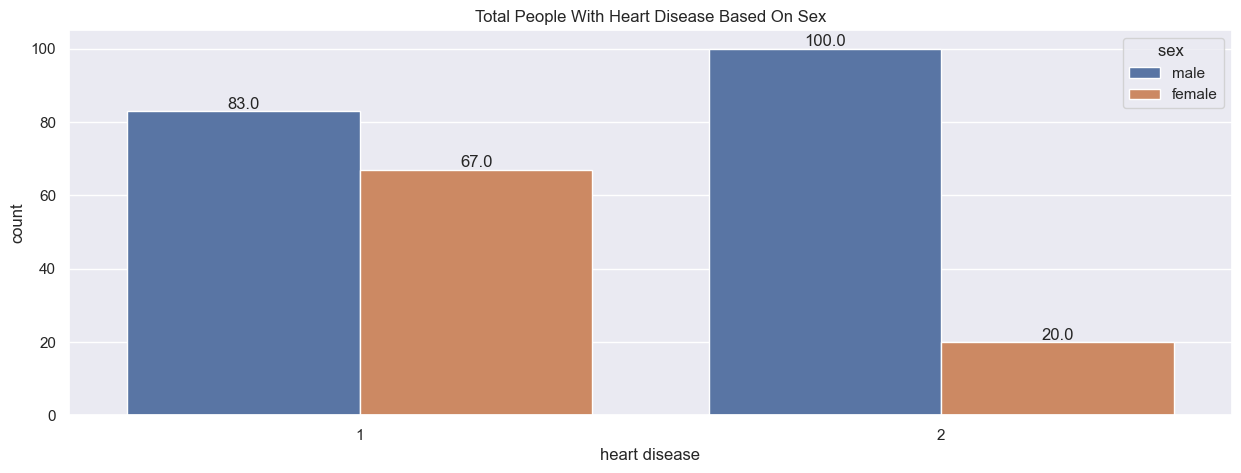

In [7]:
ax = plt.figure(figsize=(15,5))

ax = sns.countplot(data, x='heart disease', hue='sex ')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title("Total People With Heart Disease Based On Sex")

plt.show()

In [8]:
data.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

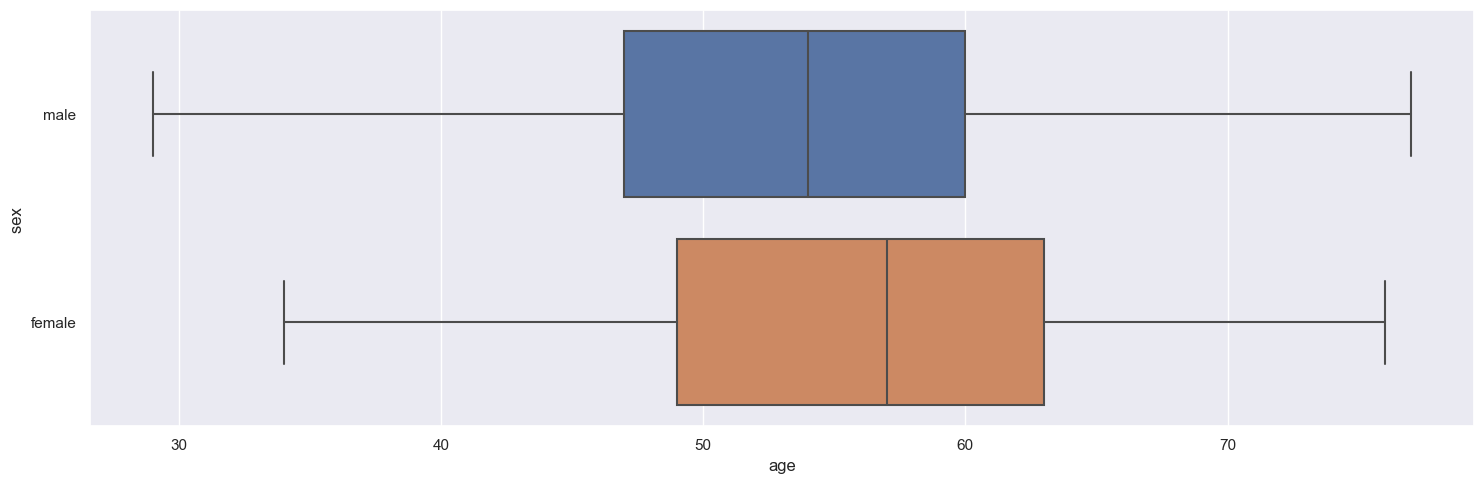

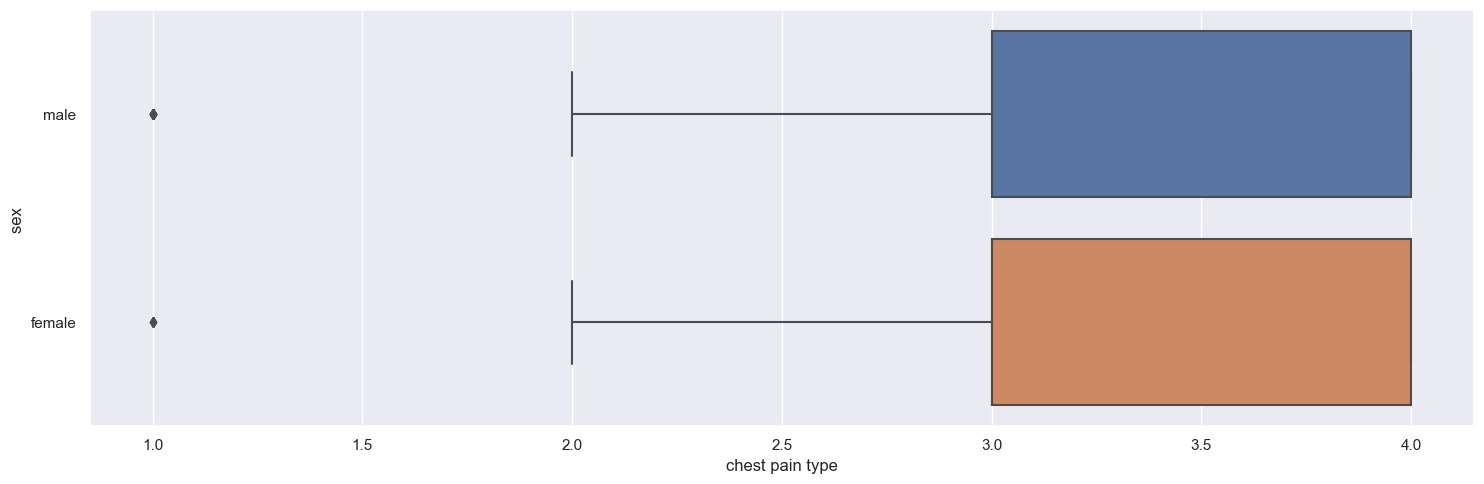

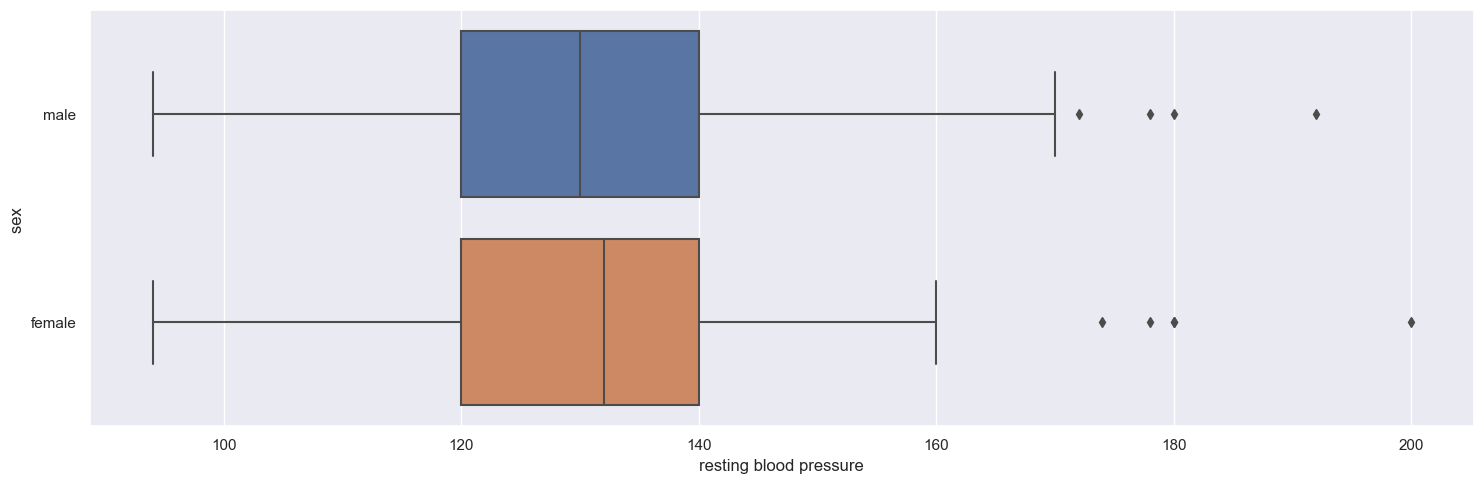

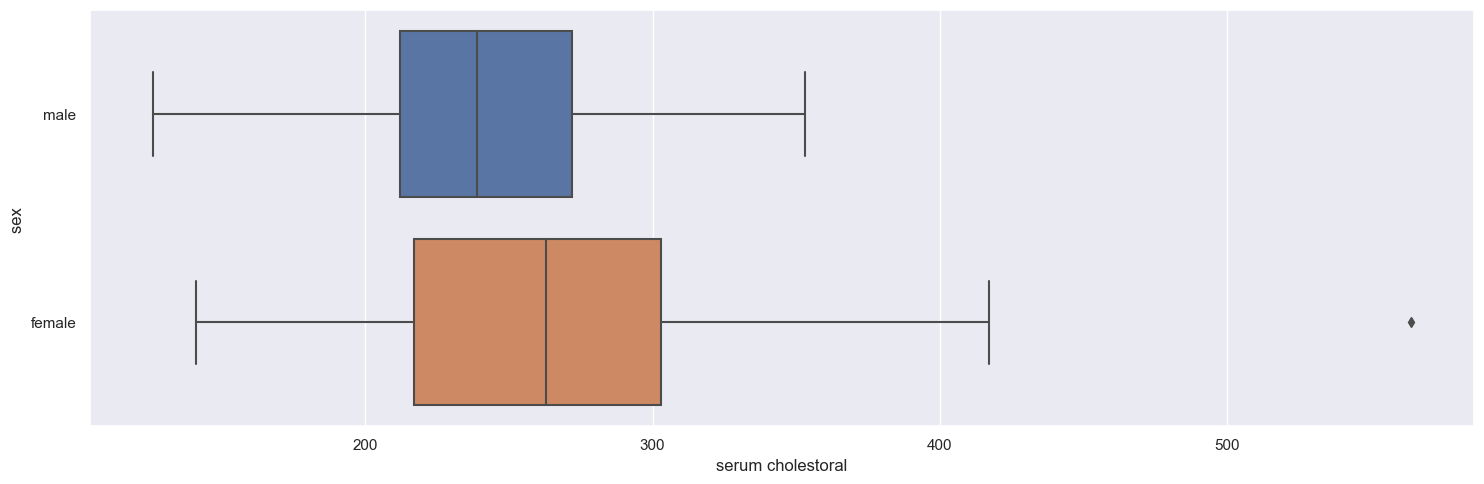

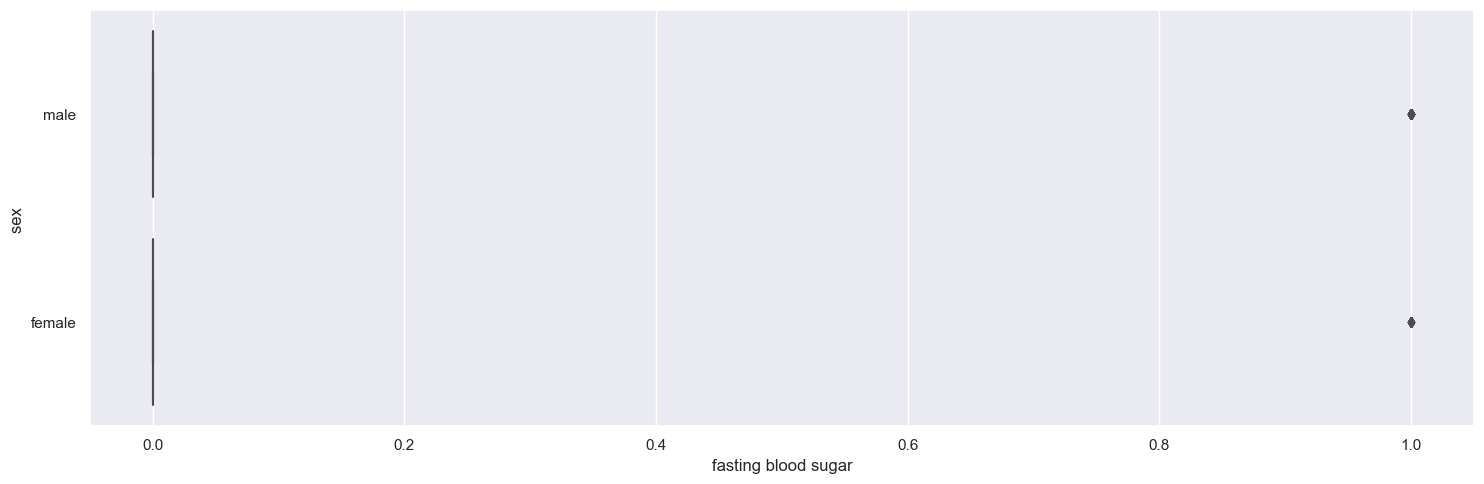

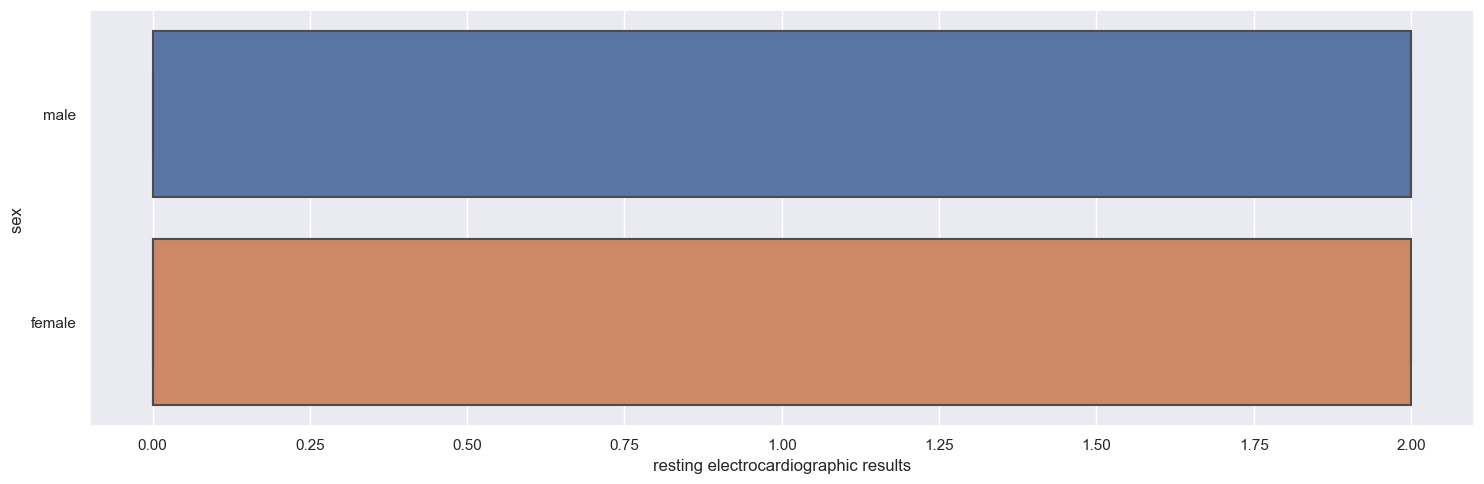

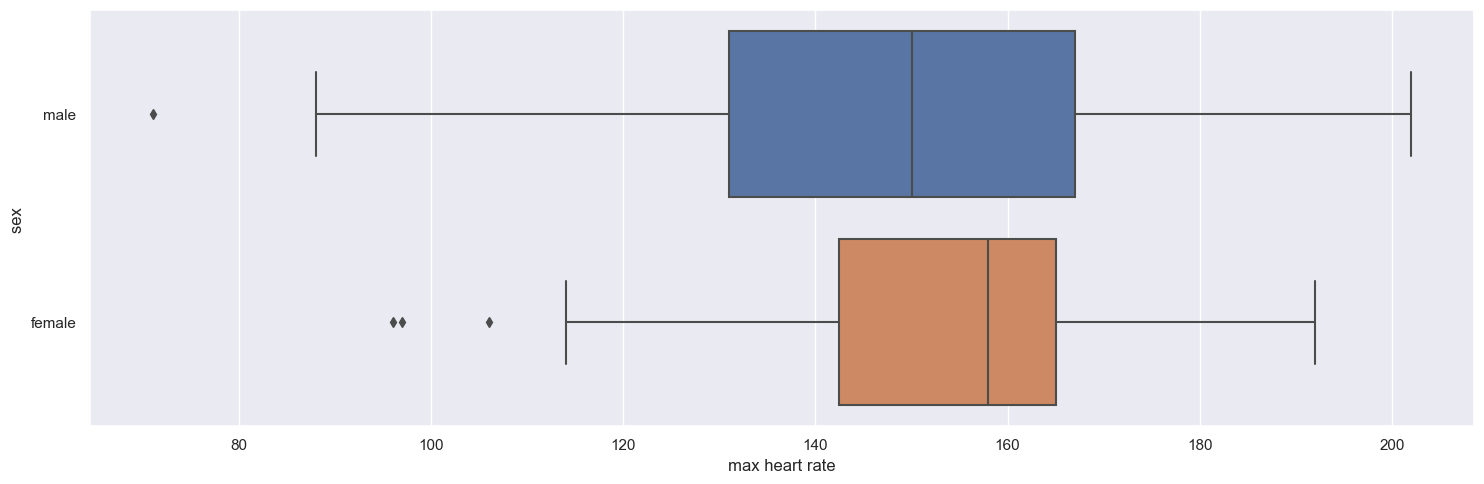

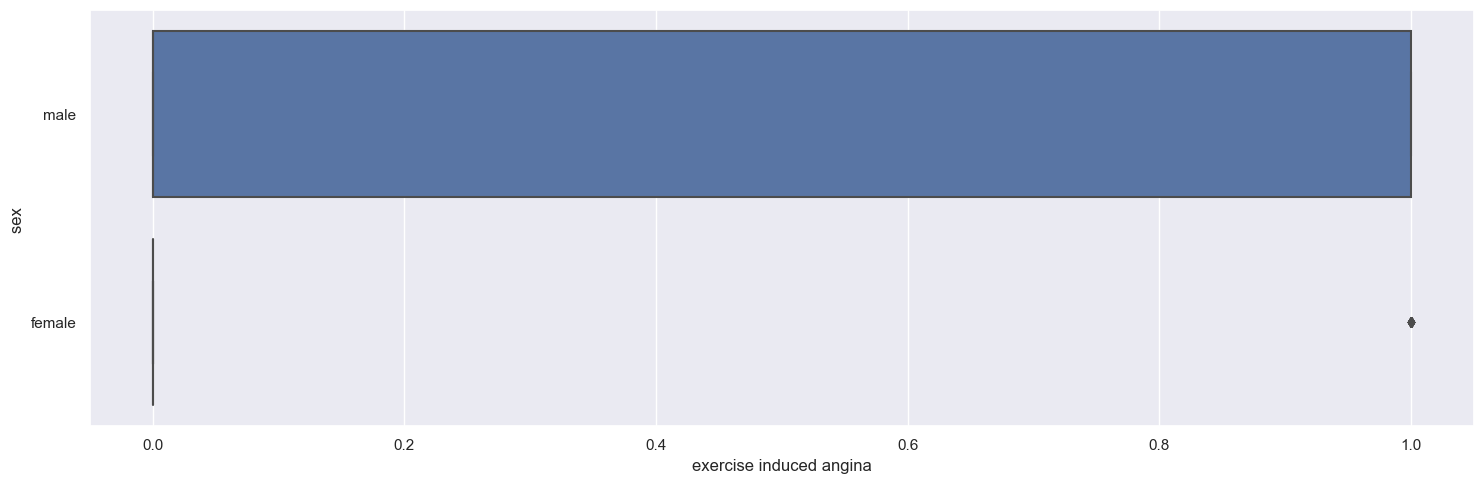

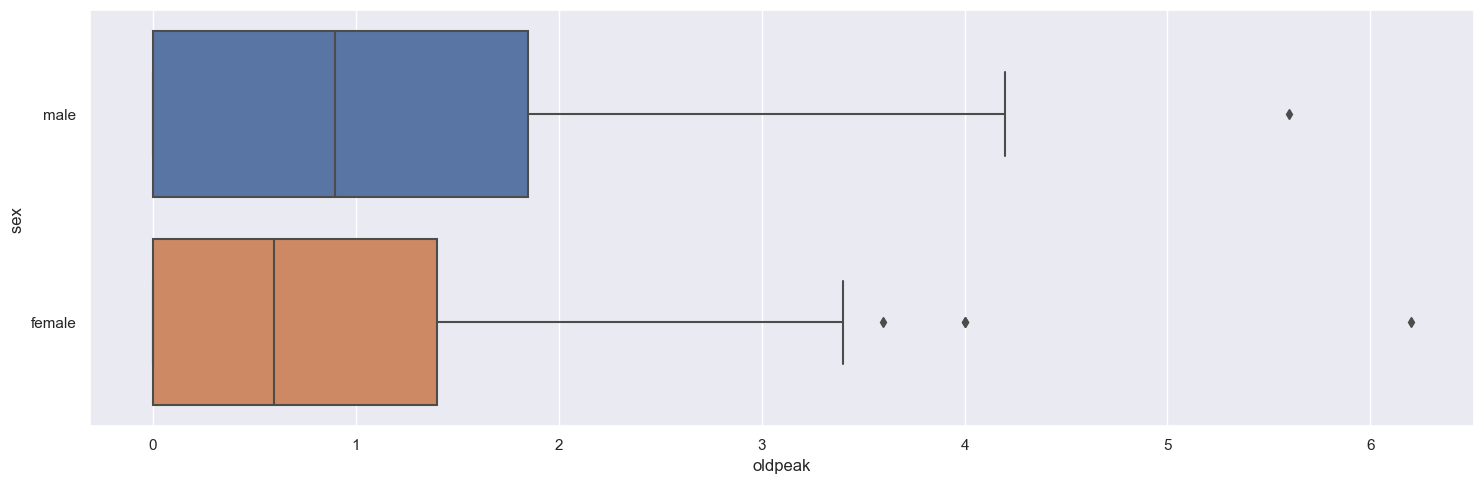

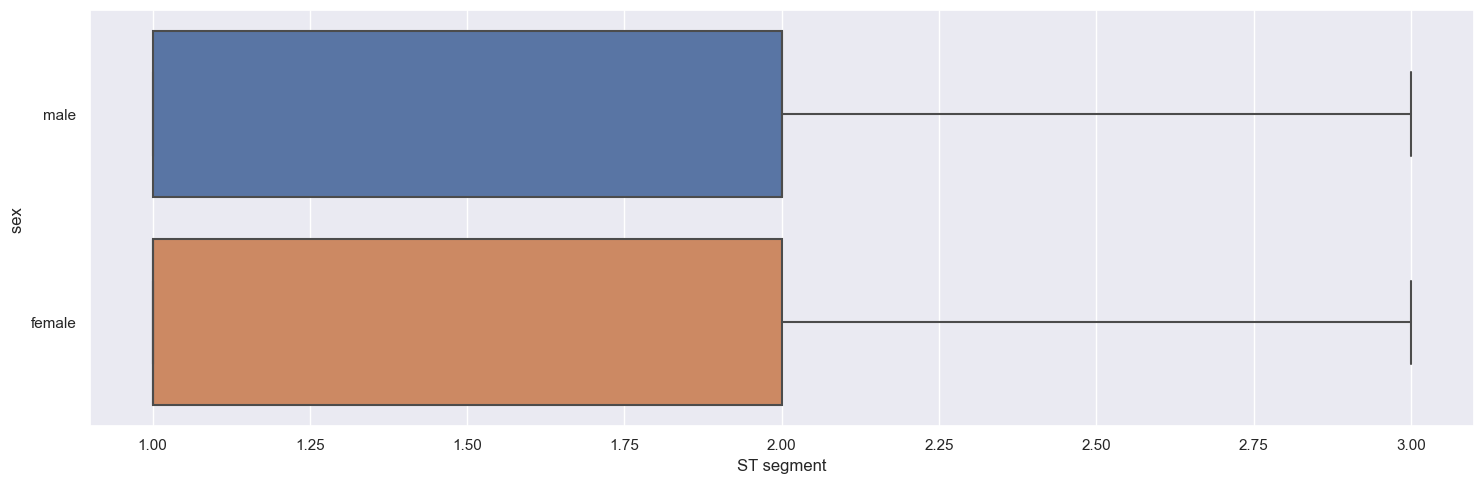

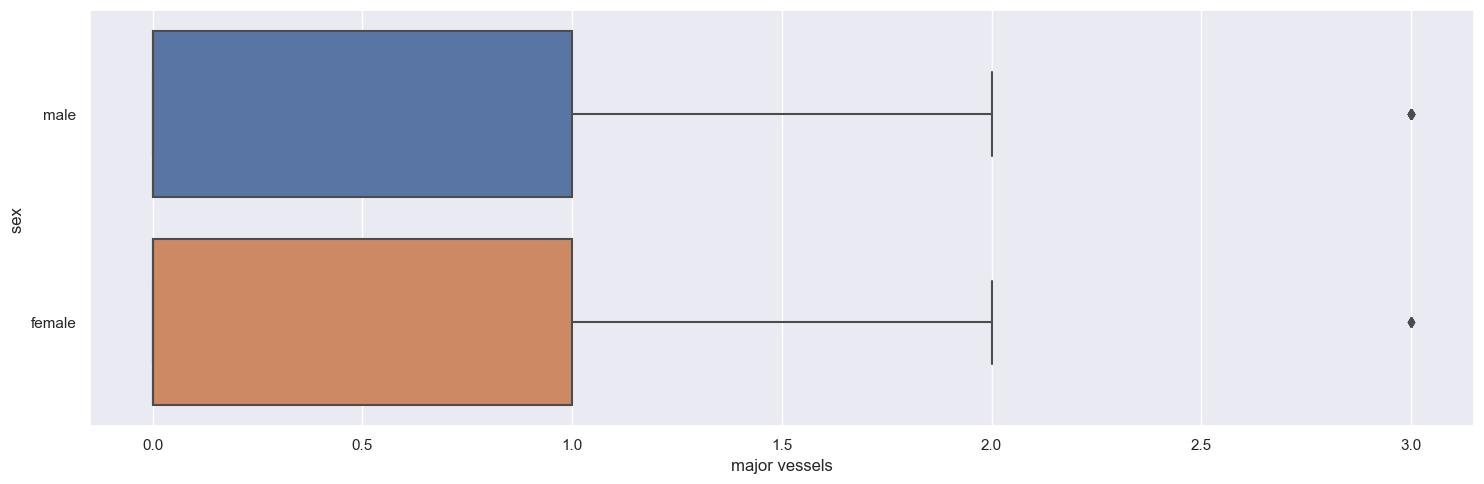

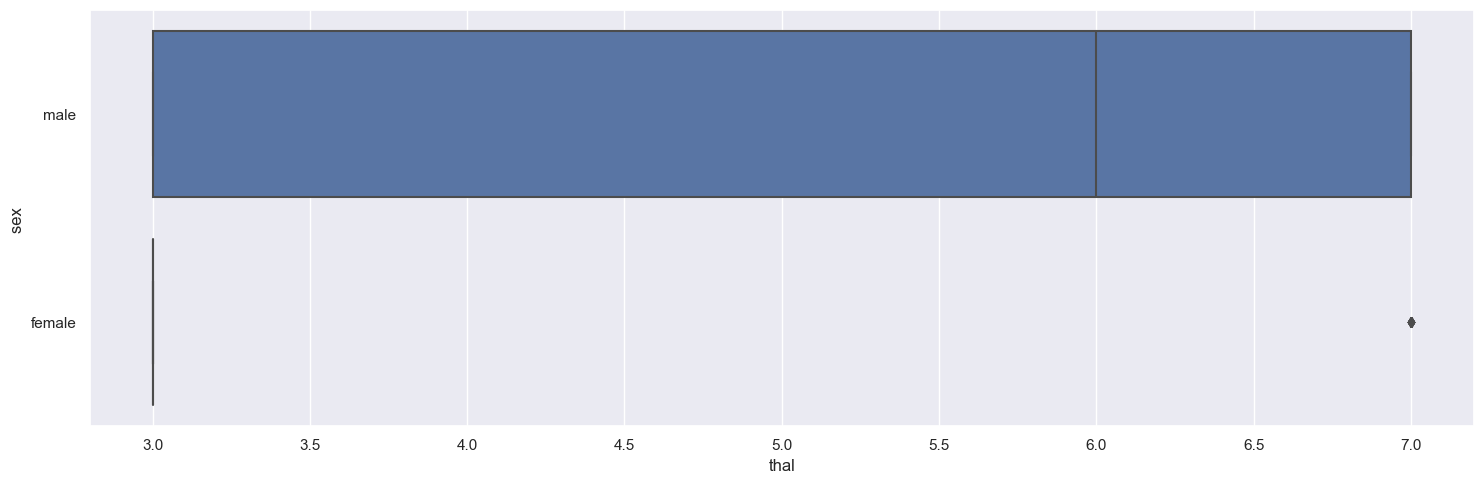

In [37]:
box_columns = ['age', 'chest pain type', 'resting blood pressure',
               'serum cholestoral', 'fasting blood sugar',
               'resting electrocardiographic results', 'max heart rate',
               'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
               'thal']

for i in box_columns:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=data[i], y=data['sex '])
    plt.tight_layout()
    plt.show()


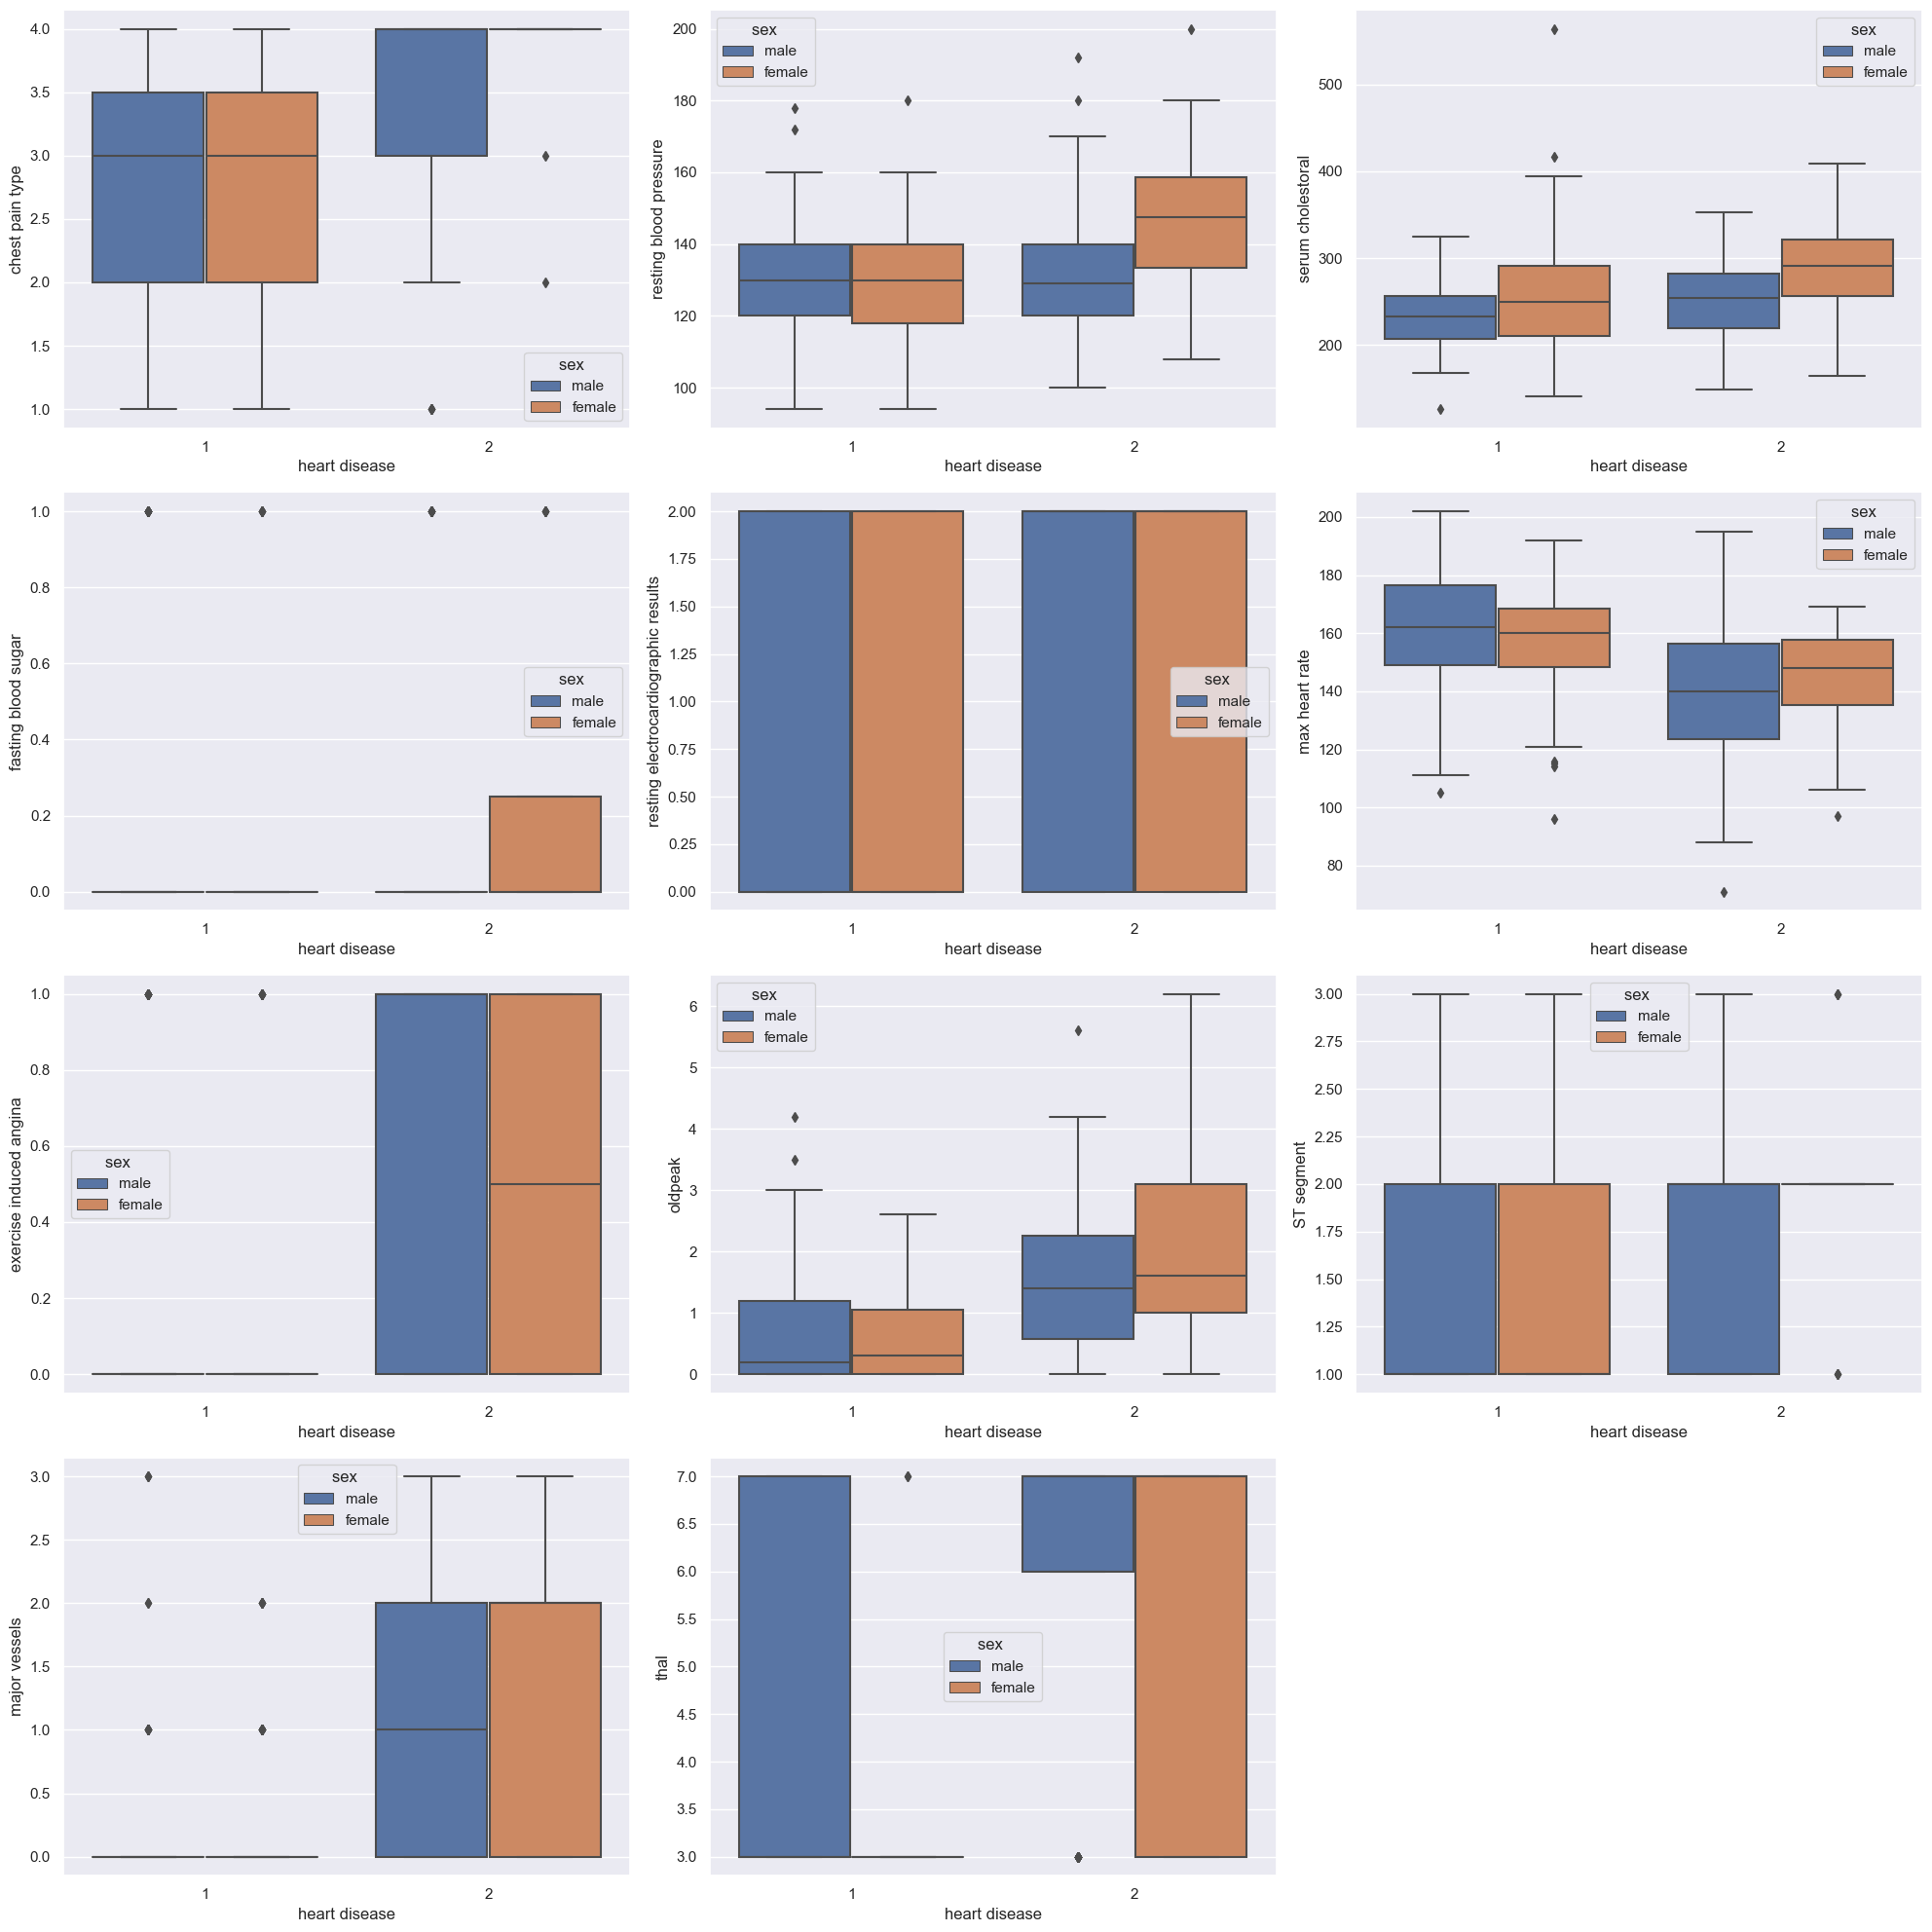

In [52]:
scatter_columns = ['chest pain type', 'resting blood pressure',
                   'serum cholestoral', 'fasting blood sugar',
                   'resting electrocardiographic results', 'max heart rate',
                   'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
                   'thal']

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(scatter_columns):
    sns.boxplot(data=data, x='heart disease', hue='sex ', y=var, ax=axs[i])

fig.delaxes(axs[11])
fig.tight_layout()
plt.show()


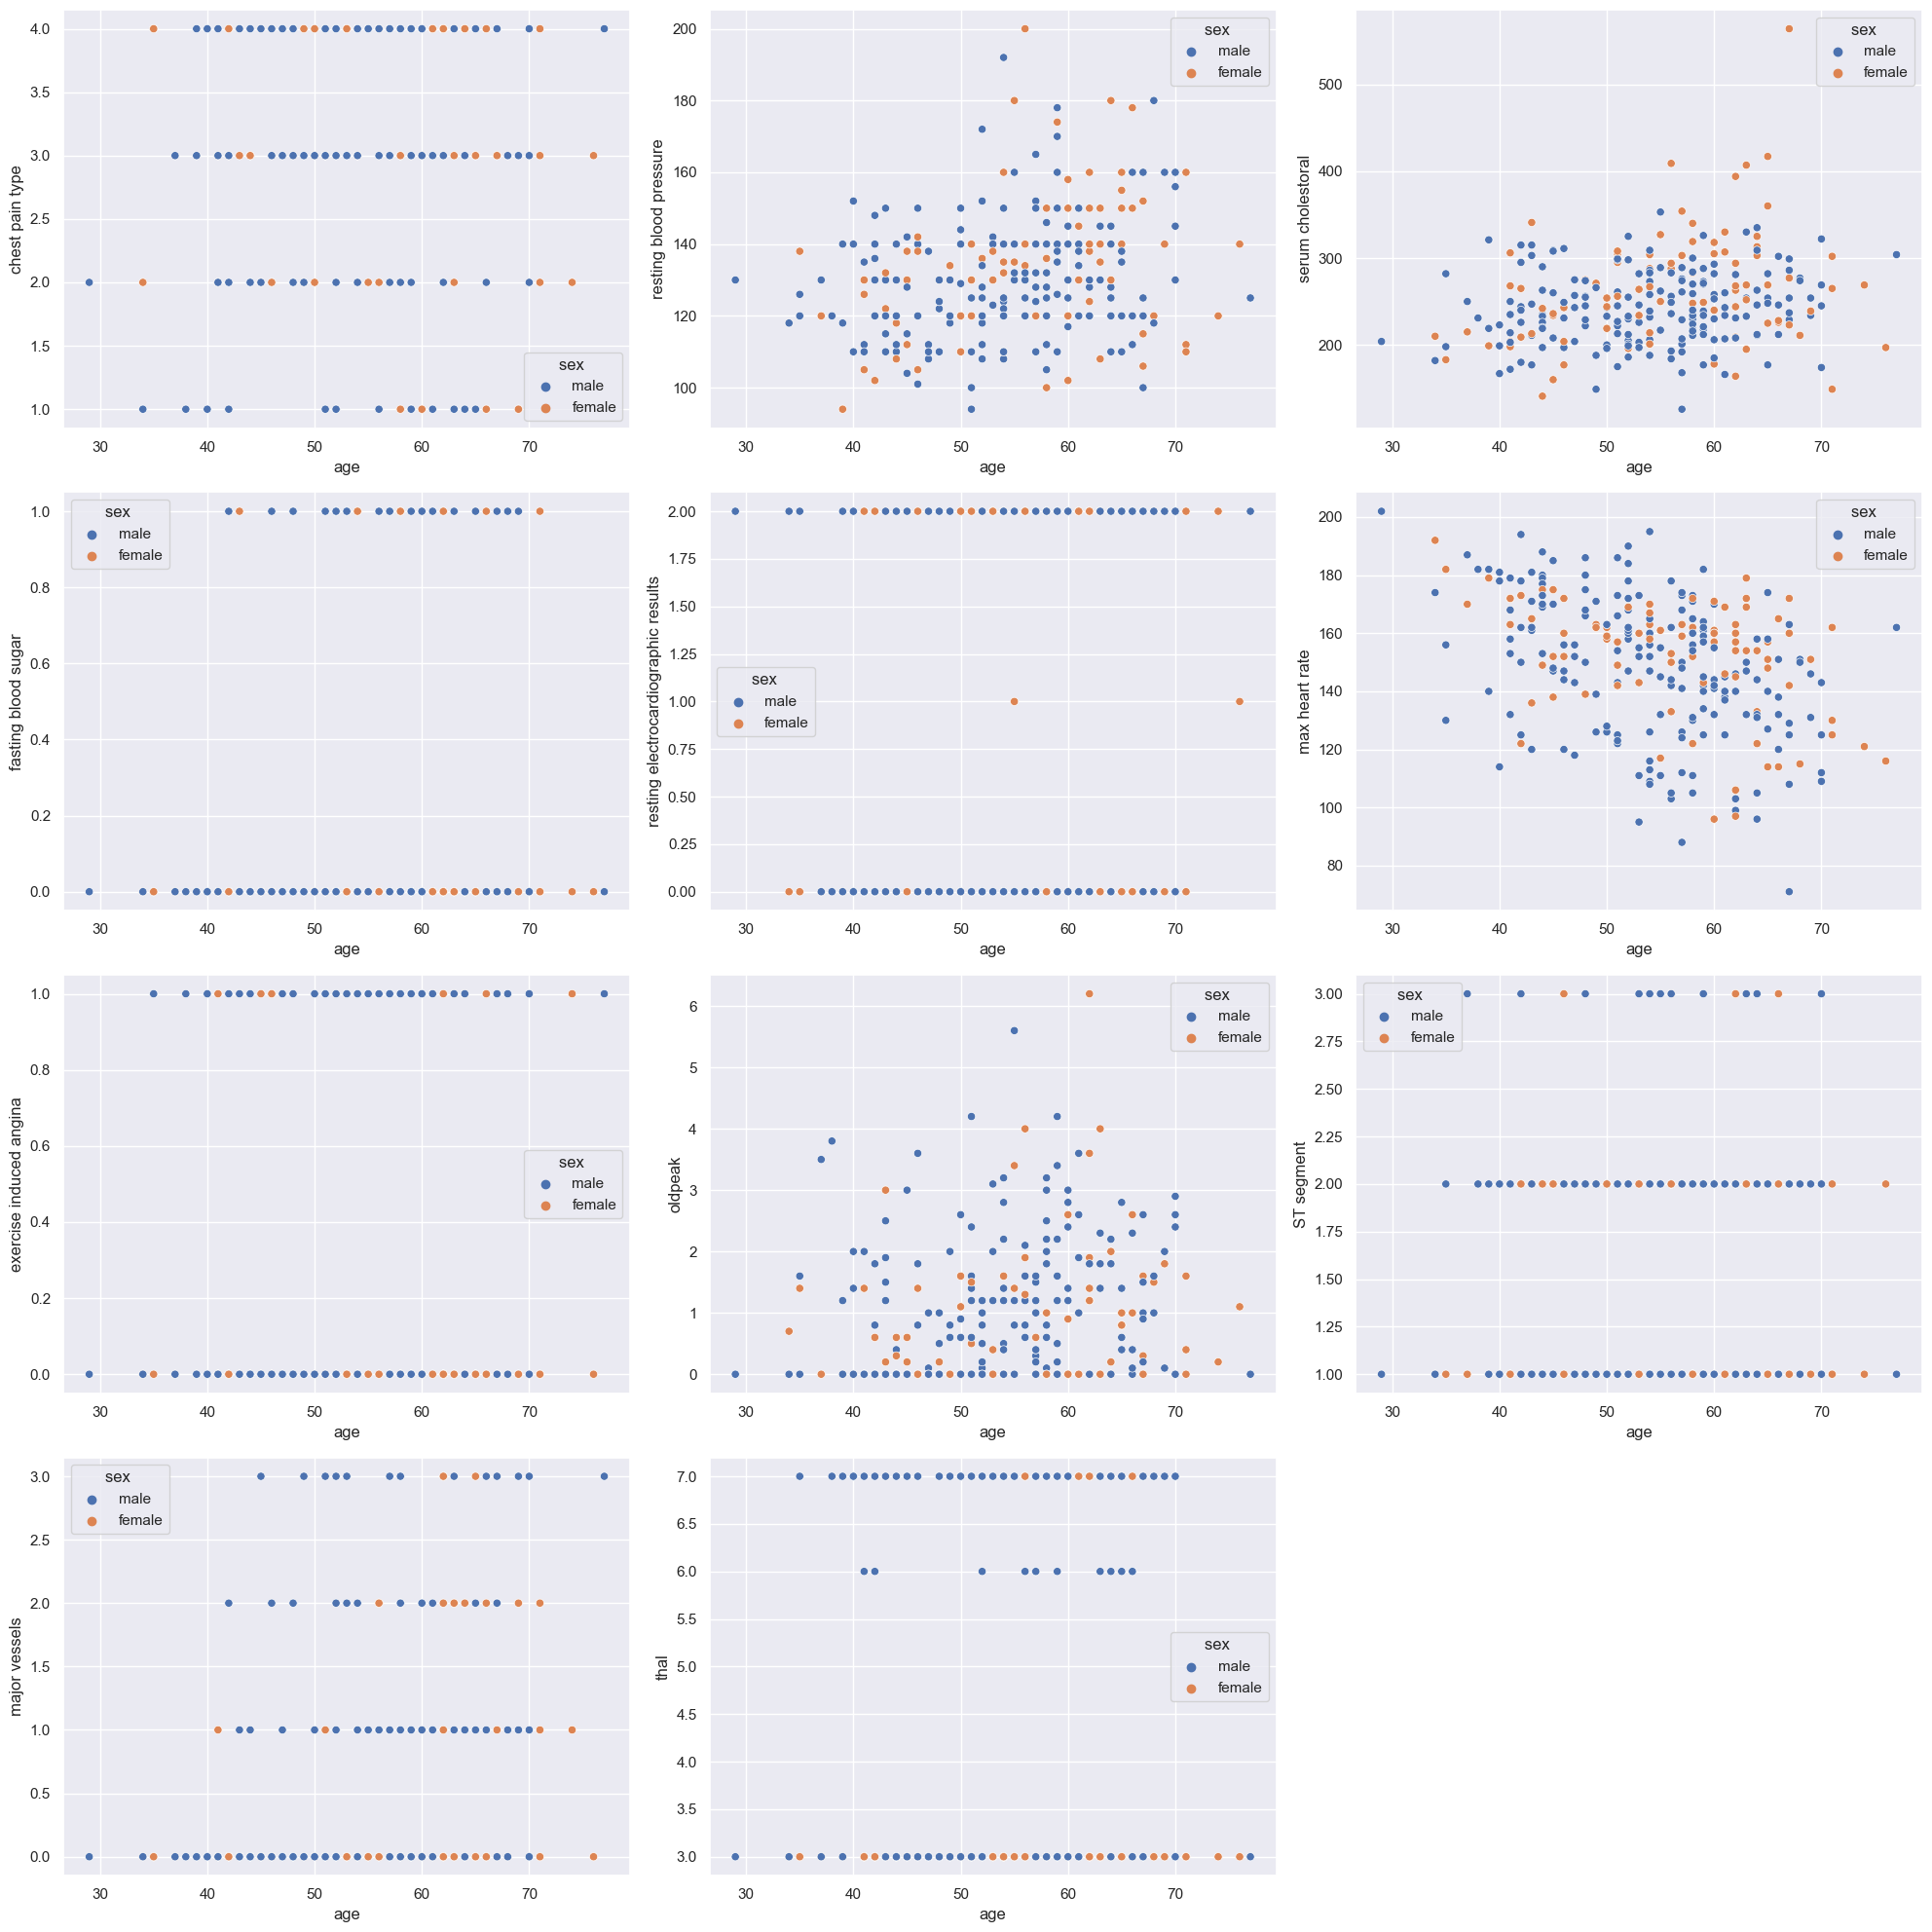

In [50]:
scatter_columns = ['chest pain type', 'resting blood pressure',
                   'serum cholestoral', 'fasting blood sugar',
                   'resting electrocardiographic results', 'max heart rate',
                   'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
                   'thal']

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(scatter_columns):
    sns.scatterplot(data=data, x='age', hue='sex ', y=var, ax=axs[i])

fig.delaxes(axs[11])
fig.tight_layout()
plt.show()


C:\Users\Ridho\AppData\Local\Temp\ipykernel_3664\1727883946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), fmt='.2g', annot=True)


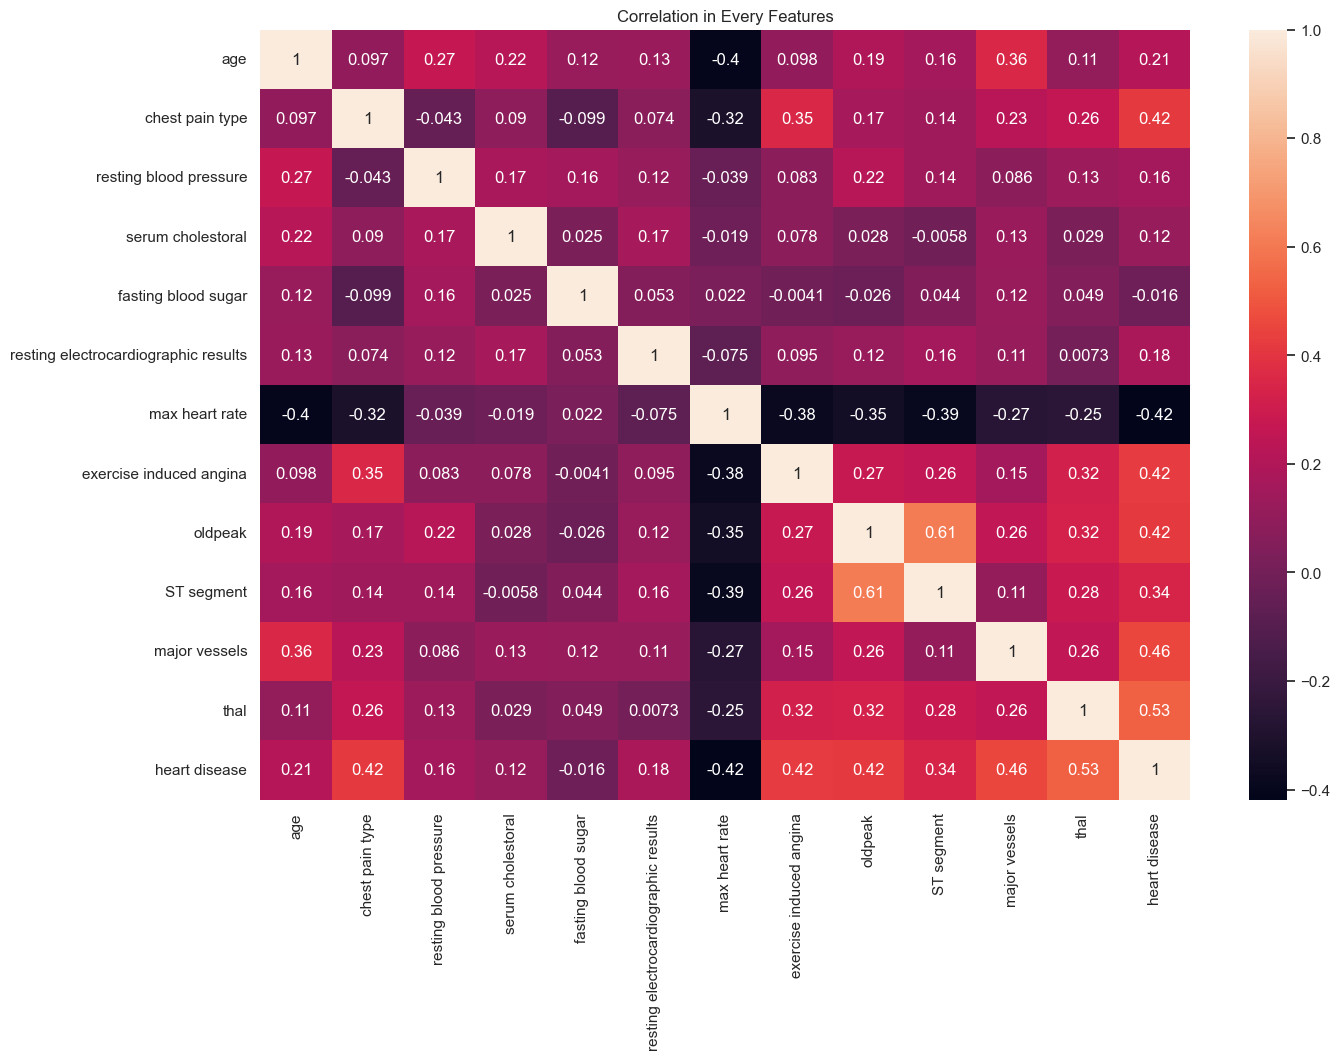

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), fmt='.2g', annot=True)
plt.title("Correlation in Every Features")
plt.show()

# Label Encoder

In [56]:
data['sex '] = data['sex '].map({'male':1, 'female' : 0})
data['sex '].unique()

array([1, 0], dtype=int64)

# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

x = data.drop('heart disease', axis=1)
y = data['heart disease']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Remove Outliers

In [58]:
data.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [60]:
from scipy import stats

selected_columns = ['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

threshold = 3

outlier_indices = np.where(z_scores > threshold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
DecisionTreeClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, splitter='random')


c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [62]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='auto', min_samples_leaf=4, min_samples_split=10, splitter='random')

tree.fit(x_train, y_train)

c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, splitter='random')

In [64]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(x_test)

print('Accuracy Score: ', round(accuracy_score(y_test, y_pred) * 100, 2), '%')


Accuracy Score:  72.22 %


# Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 1.0}
0.8428571428571429


In [66]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 7, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 200, subsample= 1.0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                           n_estimators=200)

In [69]:
from sklearn.metrics import accuracy_score

gbc_pred = gbc.predict(x_test)

print('Accuracy Score: ', round(accuracy_score(y_test, gbc_pred) * 100, 2), '%')


Accuracy Score:  77.78 %


# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
0.8714285714285716


In [71]:
rdc = RandomForestClassifier(bootstrap=True, criterion="gini", max_depth=5,
                             max_features="auto", min_samples_leaf=4, min_samples_split=5, n_estimators=500)
rdc.fit(x_train, y_train)

c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=500)

In [72]:
from sklearn.metrics import accuracy_score

rdc_pred = rdc.predict(x_test)

print('Accuracy Score: ', round(accuracy_score(y_test, rdc_pred) * 100, 2), '%')


Accuracy Score:  75.93 %
